In [63]:
import sys

# laptop
sys.path.append( '/home/greg/current/NMEG_utils/py_modules/' )
af_path = '/home/greg/sftp/eddyflux/Ameriflux_files/provisional/'
fig_path = '../figures/multiyear_figs/'
# UNM desktop
#sys.path.append( '..\\NMEG_utils\\py_modules\\' )
#af_path = 'C:\\Research_Flux_Towers\\Ameriflux_files\\'
#fig_path = 'figures\\multiyear_figs\\'

import load_nmeg as ld
import transform_nmeg as tr
import plot_nmeg as nmegplt
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
#import ipdb as ipdb

%matplotlib inline
sns.set_style("white")

In [64]:
# Years to load
start = 2007
end = 2015
# Sites to load (pulls list of AF sites from plot_nmeg module)
sites = ['Seg', 'Sen']
# Fill a dict with multiyear dataframes for each site in sites
hourly = { x : 
          ld.get_multiyr_aflx( 'US-' + x, af_path, gapfilled=True, startyear=start, endyear=end) 
          for x in sites }

Parsing /home/greg/sftp/eddyflux/Ameriflux_files/provisional/US-Seg_2007_gapfilled.txt
Parsing /home/greg/sftp/eddyflux/Ameriflux_files/provisional/US-Seg_2008_gapfilled.txt
Parsing /home/greg/sftp/eddyflux/Ameriflux_files/provisional/US-Seg_2009_gapfilled.txt
Parsing /home/greg/sftp/eddyflux/Ameriflux_files/provisional/US-Seg_2010_gapfilled.txt
Parsing /home/greg/sftp/eddyflux/Ameriflux_files/provisional/US-Seg_2011_gapfilled.txt
Parsing /home/greg/sftp/eddyflux/Ameriflux_files/provisional/US-Seg_2012_gapfilled.txt
Parsing /home/greg/sftp/eddyflux/Ameriflux_files/provisional/US-Seg_2013_gapfilled.txt
Parsing /home/greg/sftp/eddyflux/Ameriflux_files/provisional/US-Seg_2014_gapfilled.txt
Parsing /home/greg/sftp/eddyflux/Ameriflux_files/provisional/US-Seg_2015_gapfilled.txt
Parsing /home/greg/sftp/eddyflux/Ameriflux_files/provisional/US-Sen_2010_gapfilled.txt
Parsing /home/greg/sftp/eddyflux/Ameriflux_files/provisional/US-Sen_2011_gapfilled.txt
Parsing /home/greg/sftp/eddyflux/Ameriflux_

In [65]:
daily = { x : 
         tr.resample_30min_aflx( hourly[x], freq='1D', 
                                c_fluxes=[ 'GPP', 'RECO', 'FC_F' ], 
                                le_flux=[ 'LE_F' ], 
                                avg_cols=[ 'TA_F', 'RH_F', 'SW_IN_F', 'RNET_F', 'VPD_F' ], 
                                sum_cols=[ 'P_F' ] , tair_col='TA_F' ) 
         for x in hourly.keys() }
d = pd.Panel(daily)

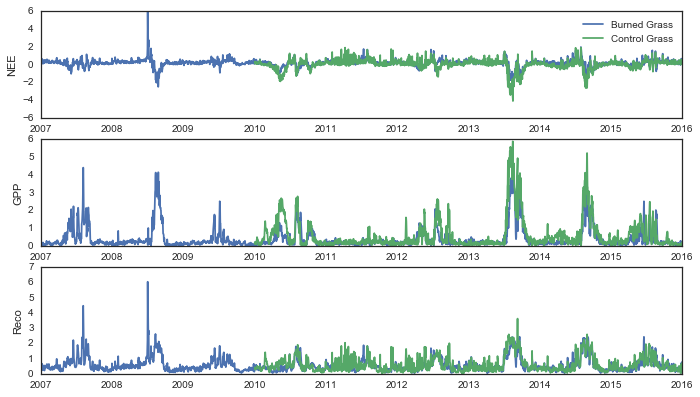

In [66]:
fig1 = plt.figure(figsize=( 11.5, 6.5 ), dpi=150, facecolor='w', edgecolor='k')
ax = plt.subplot(3, 1, 1)
ax.plot(d.Seg.index, d.Seg.FC_F_g_int)
ax.plot(d.Seg.index, d.Sen.FC_F_g_int)
ax.set_ylabel('NEE')
plt.legend(['Burned Grass', 'Control Grass'])
ax = plt.subplot(3, 1, 2)
ax.plot(d.Seg.index, d.Seg.GPP_g_int)
ax.plot(d.Seg.index, d.Sen.GPP_g_int)
ax.set_ylabel('GPP')
ax = plt.subplot(3, 1, 3)
ax.plot(d.Seg.index, d.Seg.RECO_g_int)
ax.plot(d.Seg.index, d.Sen.RECO_g_int)
ax.set_ylabel('Reco')


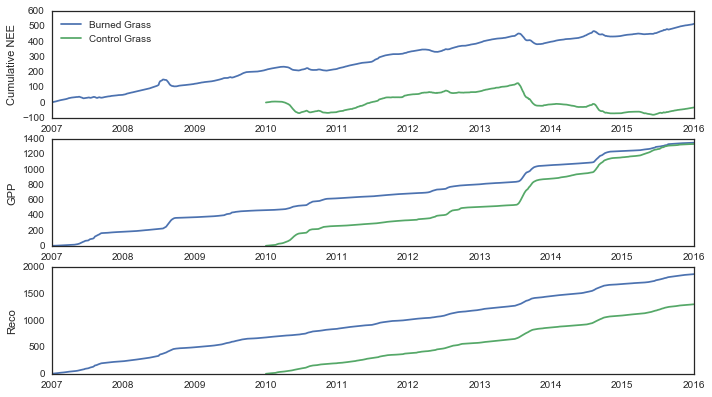

In [67]:
fig2 = plt.figure(figsize=( 11.5, 6.5 ), dpi=150, facecolor='w', edgecolor='k')
ax = plt.subplot(3, 1, 1)
ax.plot(d.Seg.index, np.cumsum(d.Seg.FC_F_g_int))
ax.plot(d.Seg.index, np.cumsum(d.Sen.FC_F_g_int))
ax.set_ylabel('Cumulative NEE')
plt.legend(['Burned Grass', 'Control Grass'], loc='upper left')
ax = plt.subplot(3, 1, 2)
ax.plot(d.Seg.index, np.cumsum(d.Seg.GPP_g_int))
ax.plot(d.Seg.index, np.cumsum(d.Sen.GPP_g_int))
ax.set_ylabel('GPP')
ax = plt.subplot(3, 1, 3)
ax.plot(d.Seg.index, np.cumsum(d.Seg.RECO_g_int))
ax.plot(d.Seg.index, np.cumsum(d.Sen.RECO_g_int))
ax.set_ylabel('Reco')

### Raw Sevilleta core ANPP data

These are data from ANPP surveys at 4 core sites and there are 2 types of survey:

1. Volume data - see <http://sev.lternet.edu/data/sev-129>
2. Destructive biomass (weights) - see <http://sev.lternet.edu/data/sev-157>

In [68]:
# Core quadrat volume based ANPP data 
vol_npp = pd.read_csv("http://sev.lternet.edu/sites/default/files/data/sev-129/sev129_nppcorequadrat_20150819.txt")
vol_npp.head()


,year,season,date,site,web,plot,quad,treatment,species,obs,cover,height,count,comment
0,1999,1,2/3/1999,C,1,E,1,C,DAPU7,1,0.50,4,13,NaN
1,1999,1,2/3/1999,C,1,E,1,C,DAPU7,2,0.10,2,16,NaN
2,1999,1,2/3/1999,C,1,E,1,C,GUSA2,1,0.01,4,2,NaN
3,1999,1,2/3/1999,C,1,E,1,C,GUSA2,2,0.10,5,1,NaN
4,1999,1,2/3/1999,C,1,E,1,C,GUSA2,3,0.50,12,1,NaN


In [69]:
# I think these are the destructive (weights) used to correlate with volume
wt_npp = pd.read_csv("http://sev.lternet.edu/sites/default/files/data/sev157_nppweight_20160119_0.txt")
wt_npp.head()


,Year,Season,Date,Site,Treatment,Species,Observation,Count,Cover,Height,Live_Weight,Dead_Weight,Book,Comments
0,1999,1,2/4/1999,C,C,ARDI5,1,1,0.10,14,0.04,-888.0,99-1,NaN
1,1999,1,2/4/1999,C,C,ARDI5,2,1,0.10,14,0.06,-888.0,99-1,NaN
2,1999,1,2/4/1999,C,C,ARDI5,3,1,0.10,21,0.10,-888.0,99-1,NaN
3,1999,1,2/4/1999,C,C,ARDI5,4,1,0.25,20,0.37,-888.0,99-1,NaN
4,1999,1,2/4/1999,C,C,ARDI5,5,1,0.25,20,0.29,-888.0,99-1,NaN


### Combined volume and destructive (allometry) ANPP data 

see <http://sev.lternet.edu/data/sev-182>

Pretty sure this is the combination of the two datasets above into actual biomass numbers

In [70]:
allom_npp = pd.read_csv("http://sev.lternet.edu/sites/default/files/data/sev-182/sev182_nppcorewebbiomass_20150817.txt")
allom_npp.head()

,year,site,treatment,web,plot,quad,species,wwt,swt,fwt,snpp,fnpp,anpp
0,1999,C,C,1,E,1,CHSE7,0.00,0.00,0.05,0.00,0.05,0.05
1,1999,C,C,1,E,1,CHSES,0.00,0.00,0.04,0.00,0.04,0.04
2,1999,C,C,1,E,1,DAPU7,0.12,1.62,2.79,1.49,1.17,2.67
3,1999,C,C,1,E,1,GUSA2,0.79,0.31,18.43,0.00,18.12,18.12
4,1999,C,C,1,E,1,LEFE,0.37,0.17,0.00,0.00,0.00,0.00


B = Blue grama core site
G = Black grama core site
C = Creosote shrub core site

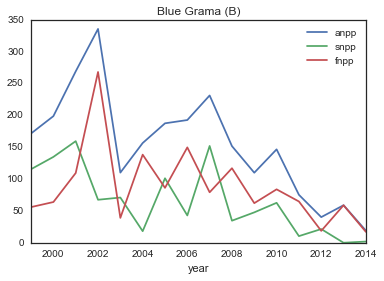

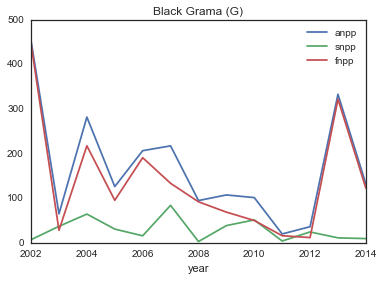

In [71]:
# Run through sites and plot long term npp data
sites = ['C', 'B']
names = ['Blue Grama (B)', 'Black Grama (G)']
for i, site in enumerate(sites):
    # Subset by site
    subset = allom_npp[allom_npp.site==site]
    # Rename plot so pandas isn't confused
    subset = subset.rename(columns={'plot':'plotname'})
    # Group by year, web, and plot and sum anpp for all species
    gby = subset.groupby(['year', 'web', 'plotname'], as_index=False)
    sumanpp = gby.sum()
    # Group by year and take average of these sums
    gby = sumanpp.groupby('year')
    avganpp = gby.mean()
    # Plot
    plt.figure()
    avganpp.anpp.plot()
    avganpp.snpp.plot()
    avganpp.fnpp.plot()
    plt.legend()
    plt.title(names[i])